In [323]:

import pandas as pd
import numpy as np
import pickle
from datetime import datetime
from prophet import Prophet
from prophet.utilities import regressor_coefficients
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [324]:
raw_data = pd.read_pickle("raw_data.pickle")

raw_data['ds'] = pd.to_datetime(raw_data.index)
raw_data.rename(columns={'SOL_close':"y"},inplace=True)



In [ ]:
zsc_prd = 1
data = raw_data.copy()

"""
data["y"] = np.log(data["y"]).diff().dropna()
data[data.columns.difference(['y','ds'])] = (data[data.columns.difference(['y','ds'])] - data[data.columns.difference(['y','ds'])].rolling(window=zsc_prd, min_periods=min(zsc_prd,24)).mean()) / \
            data[data.columns.difference(['y','ds'])].rolling(window=zsc_prd, min_periods=min(zsc_prd,24)).std()

"""

data = data.ffill()

data_shifted = data.copy()


data_shifted[data_shifted.columns.difference(['y','ds'])] = data_shifted[data_shifted.columns.difference(['y','ds'])].shift(7)

data = data.dropna()
data_shifted = data_shifted.dropna()

data

,y,SOL_mc,SOL_volume,BTC_close,ETH_close,SOL_fr,TVL_USD,Equity Factor,Mkt Vol Factor,ECSURPUS Index,...,CPI YOY Index,Inflation Factor,Risk-on/Risk-off Factor,Nominal Rates Factor,FEDL01 Change Factor,Curve Shape,Equity Weight,Tsy Bond Weight,Risk Parity Factor,ds
2021-03-18,14.277756,3.813907e+09,1.181280e+08,59014.925632,1828.754833,0.004283,148988798,3915.46,21.58,0.338755,...,1.67621,388.6760,1468.92,0.065492,0.0,0.045392,0.284565,0.715435,2864.543233,2021-03-18
2021-03-19,14.268676,3.818503e+09,9.833702e+07,57922.409593,1780.159646,0.000865,153204289,3913.10,20.95,0.338755,...,1.67621,388.4664,1464.80,0.012882,0.0,0.016799,0.280172,0.719828,2858.695315,2021-03-19
2021-03-20,14.182867,3.784531e+09,8.684253e+07,58243.270609,1817.132963,0.000499,147690914,3913.10,20.95,0.338755,...,1.67621,388.4664,1464.80,0.000000,0.0,0.000000,0.279399,0.720601,2857.563946,2021-03-20
2021-03-21,14.275804,3.827195e+09,8.634340e+07,58376.158471,1817.860143,0.000327,151935325,3913.10,20.95,0.338755,...,1.67621,388.4664,1464.80,0.000000,0.0,0.000000,0.276883,0.723117,2853.878872,2021-03-21
2021-03-22,14.306230,3.820744e+09,7.948416e+07,57573.539345,1790.378075,0.000128,152981122,3940.59,18.88,0.308692,...,1.67621,389.4017,1485.36,-0.026452,0.0,-0.024466,0.268093,0.731907,2853.443897,2021-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,176.455072,9.167281e+10,5.807896e+09,103594.425751,2603.718089,0.000020,9377206736,5916.93,17.83,-0.064881,...,2.31129,336.8476,3579.93,-0.104818,0.0,-0.014802,0.056309,0.943691,2538.581990,2025-05-15
2025-05-16,168.752697,8.770307e+10,5.419257e+09,103708.851364,2542.296692,0.000062,9133860717,5958.38,17.24,-0.092805,...,2.31129,337.1940,3620.89,0.045479,0.0,0.006801,0.053825,0.946175,2532.383800,2025-05-16
2025-05-17,167.768124,8.732407e+10,4.389550e+09,103556.034940,2544.387038,-0.000002,9023656924,5958.38,17.24,-0.092805,...,2.31129,337.1940,3620.89,0.000000,0.0,0.000000,0.050262,0.949738,2519.483848,2025-05-17
2025-05-18,165.939417,8.625805e+10,3.269430e+09,103212.364839,2475.054393,0.000149,9010591266,5958.38,17.24,-0.092805,...,2.31129,337.1940,3620.89,0.000000,0.0,0.000000,0.047195,0.952805,2508.378766,2025-05-18


In [326]:
data_train = data[data.index < datetime(2025,1,1)]
data_test = data[data.index >= datetime(2025,1,1)]

data_shifted_train = data_shifted[data_shifted.index < datetime(2025,1,1)]
data_shifted_test = data_shifted[data_shifted.index >= datetime(2025,1,1)]

data_shifted_test

,y,SOL_mc,SOL_volume,BTC_close,ETH_close,SOL_fr,TVL_USD,Equity Factor,Mkt Vol Factor,ECSURPUS Index,...,CPI YOY Index,Inflation Factor,Risk-on/Risk-off Factor,Nominal Rates Factor,FEDL01 Change Factor,Curve Shape,Equity Weight,Tsy Bond Weight,Risk Parity Factor,ds
2025-01-01,189.451684,9.458022e+10,4.227931e+09,98695.714008,3497.555288,0.000006,8.624095e+09,6040.04,14.27,-0.060593,...,2.74939,323.2668,3754.17,0.000000,0.0,0.000000,0.214527,0.785473,3091.240269,2025-01-01
2025-01-02,193.646791,9.466365e+10,3.348485e+09,99344.954174,3494.510927,0.000143,8.655794e+09,6037.59,14.73,-0.067416,...,2.74939,323.1797,3750.65,-0.005980,0.0,-0.001856,0.223384,0.776616,3124.775115,2025-01-02
2025-01-03,207.878627,9.022341e+10,3.632161e+09,95678.312446,3327.789776,-0.000070,8.382585e+09,5970.84,15.95,-0.041172,...,2.74939,322.9656,3688.50,0.042625,0.0,0.044687,0.229380,0.770620,3128.407673,2025-01-03
2025-01-04,217.647289,8.811369e+10,3.493249e+09,94331.947271,3328.611155,0.000097,8.296848e+09,5970.84,15.95,-0.041172,...,2.74939,322.9656,3688.50,0.000000,0.0,0.000000,0.233494,0.766506,3143.581583,2025-01-04
2025-01-05,216.683648,9.347239e+10,2.617140e+09,95184.619453,3397.834121,0.000042,8.652743e+09,5970.84,15.95,-0.041172,...,2.74939,322.9656,3688.50,0.000000,0.0,0.000000,0.237420,0.762580,3158.062177,2025-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,176.455072,7.641753e+10,4.811988e+09,97026.493770,1810.316927,0.000179,7.838577e+09,5663.94,22.48,-0.039032,...,2.31129,339.3201,3319.83,0.109090,0.0,0.011649,0.070551,0.929449,2578.325777,2025-05-15
2025-05-16,168.752697,8.477810e+10,7.618037e+09,103076.275555,2197.561189,0.000300,8.434722e+09,5659.91,21.90,-0.039032,...,2.31129,338.7278,3314.34,0.000000,0.0,-0.017033,0.066687,0.933313,2566.594529,2025-05-16
2025-05-17,167.768124,8.963502e+10,8.703440e+09,102962.540457,2341.407963,0.000300,8.787115e+09,5659.91,21.90,-0.039032,...,2.31129,338.7278,3314.34,0.000000,0.0,0.000000,0.063478,0.936522,2555.957116,2025-05-17
2025-05-18,165.939417,9.201396e+10,4.641292e+09,104630.879299,2583.682905,0.000251,9.472963e+09,5659.91,21.90,-0.039032,...,2.31129,338.7278,3314.34,0.000000,0.0,0.000000,0.059738,0.940262,2543.562400,2025-05-18


DEBUG:cmdstanpy:input tempfile: /var/folders/ky/bkmw074j5j5_ss2q259cfpq80000gn/T/tmpx6suat6n/eego1x56.json
DEBUG:cmdstanpy:input tempfile: /var/folders/ky/bkmw074j5j5_ss2q259cfpq80000gn/T/tmpx6suat6n/tezo6fim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/hamzamuhammad/Library/Python/3.9/lib/python/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24905', 'data', 'file=/var/folders/ky/bkmw074j5j5_ss2q259cfpq80000gn/T/tmpx6suat6n/eego1x56.json', 'init=/var/folders/ky/bkmw074j5j5_ss2q259cfpq80000gn/T/tmpx6suat6n/tezo6fim.json', 'output', 'file=/var/folders/ky/bkmw074j5j5_ss2q259cfpq80000gn/T/tmpx6suat6n/prophet_modelngiz7ap5/prophet_model-20250526154454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:44:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:44:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processi

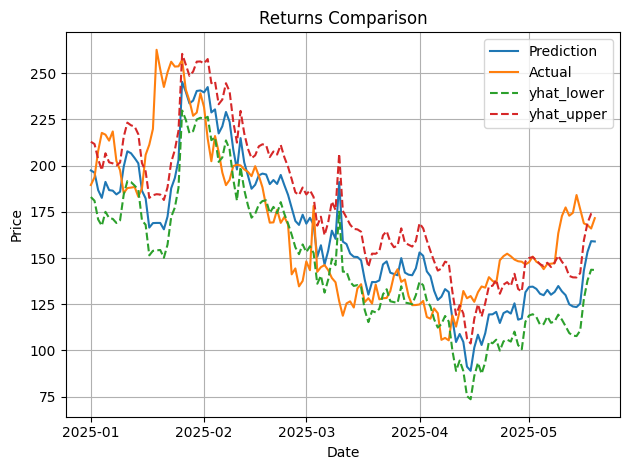

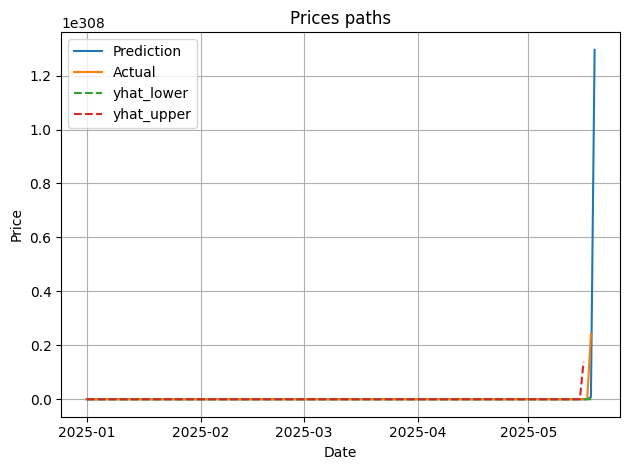

r2 : 0.47112261103010356
rmse : 28.66770299988865


In [327]:
m = Prophet(daily_seasonality=True)
list_regressors = ["BTC_close","Equity Factor"]
for column in data.columns.difference(['y','ds']):
    m.add_regressor(column,standardize=True)

m.fit(data_shifted_train)

future = m.make_future_dataframe(periods=150)
future = pd.merge(future,data_shifted_test[data_shifted_test.columns.difference(['y','ds'])],left_on=future["ds"],right_on=data_shifted_test["ds"])

future.drop(columns={"key_0"},inplace=True)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

plot_df = pd.merge(
    forecast,
    data_shifted_test,
    on='ds',
    how='inner'
)

plot_df = plot_df.rename(
    columns={'y': 'y_actual'}
    )[['ds', 'yhat', 'y_actual','yhat_lower', 'yhat_upper']]

lower_path = 100 * (1+plot_df["yhat_lower"]).cumprod()
actual_path = 100 * (1+plot_df["y_actual"]).cumprod()
upper_path = 100 * (1+plot_df["yhat_upper"]).cumprod()

center_path = 100 * (1+plot_df["yhat"]).cumprod()



plt.plot(plot_df["ds"],plot_df["yhat"],label = "Prediction")
plt.plot(plot_df["ds"],plot_df["y_actual"],label = "Actual")
plt.plot(plot_df["ds"],plot_df["yhat_lower"],label = "yhat_lower",linestyle='--')
plt.plot(plot_df["ds"],plot_df["yhat_upper"],label = "yhat_upper",linestyle='--')

plt.title('Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.plot(plot_df["ds"],center_path,label = "Prediction")
plt.plot(plot_df["ds"],actual_path,label = "Actual")
plt.plot(plot_df["ds"],lower_path,label = "yhat_lower",linestyle='--')
plt.plot(plot_df["ds"],upper_path,label = "yhat_upper",linestyle='--')

plt.title('Prices paths')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

rmse = np.sqrt(mean_squared_error(plot_df["y_actual"], plot_df["yhat"]))
r2 = r2_score(plot_df["y_actual"], plot_df["yhat"])

print(f"r2 : {r2}")
print(f"rmse : {rmse}")

In [328]:
betas = regressor_coefficients(m)
betas = betas.sort_values(by='coef').tail(10)
list_betas = betas.regressor
print(list_betas)

6                    ETH_close
8                Equity Factor
4                   DXY Factor
21             Tsy Bond Factor
5               ECSURPUS Index
3                  Curve Shape
23    US 10Y Rate Level Factor
24     US 2Y Rate Level Factor
9                Equity Weight
17                      SOL_fr
Name: regressor, dtype: object


<function prophet.forecaster.Prophet.plot_components(self, fcst, uncertainty=True, plot_cap=True, weekly_start=0, yearly_start=0, figsize=None)>

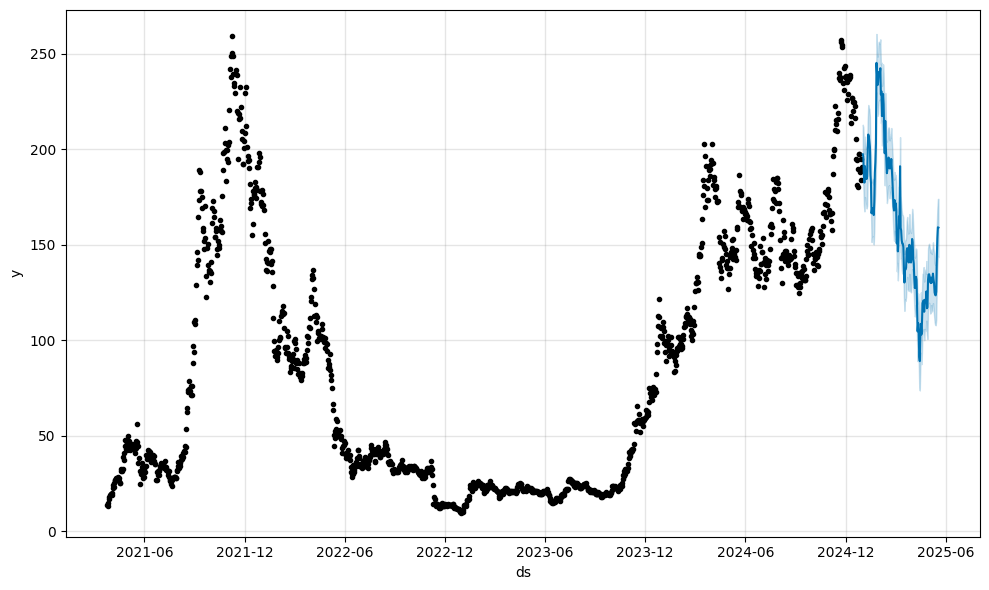

In [329]:
fig1 = m.plot(forecast)
Prophet.plot_components

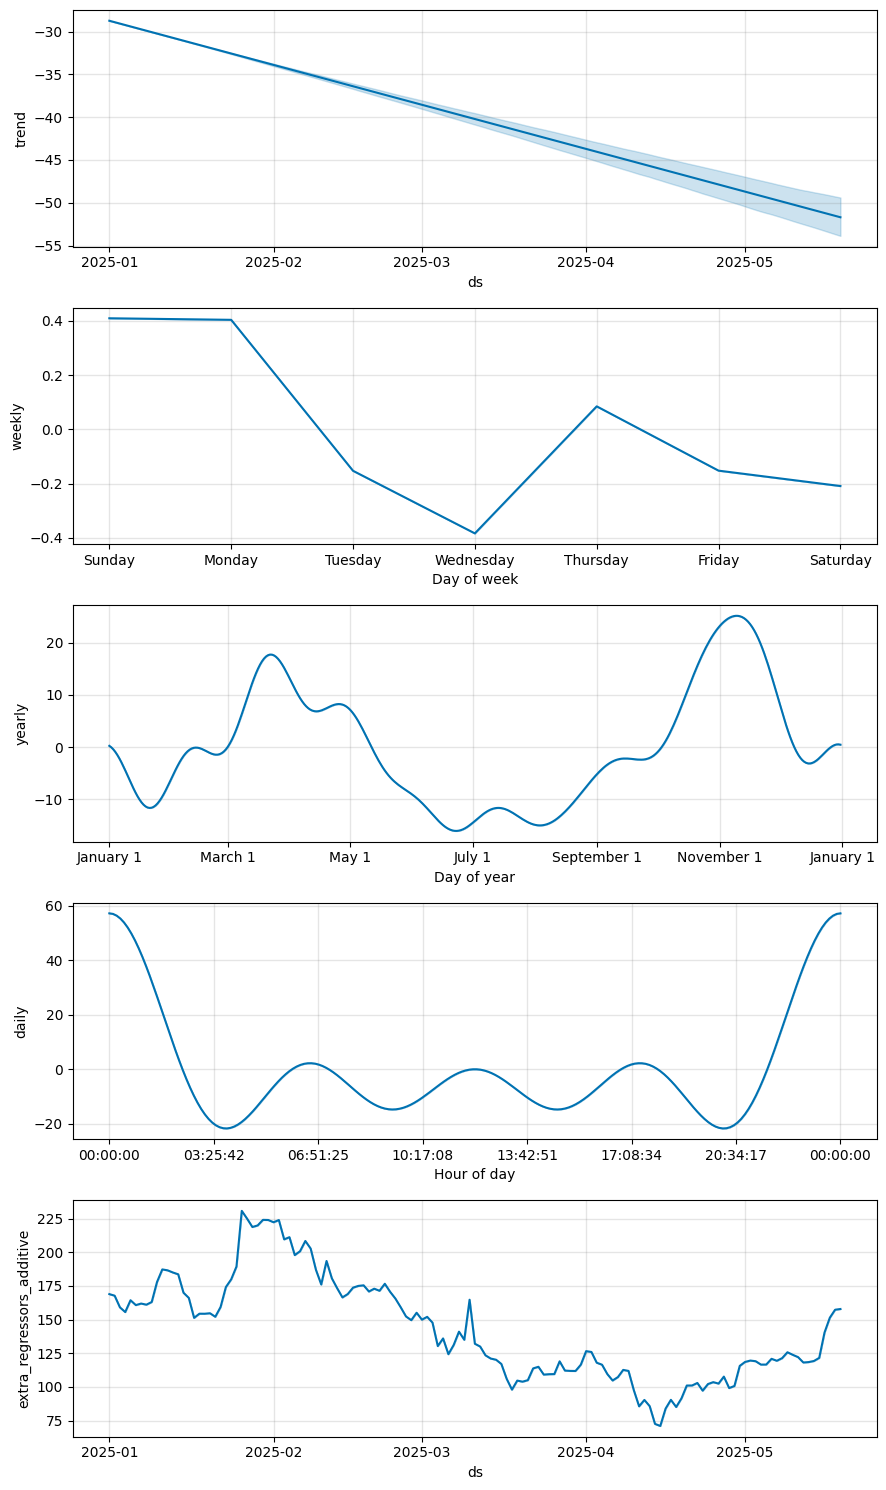

In [330]:
fig2 = m.plot_components(forecast)

In [331]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)
